## Trial of Time Series Analysis by Tensorflow Probability - Autoregressive Model
#### Based on https://bayesiancomputationbook.com/markdown/chp_06.html#autoregressive-models

In [187]:
%load_ext autoreload
%autoreload 2

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_probability as tfp
import arviz as az

In [132]:
n_t = 200

In [133]:
# %load 'ar1_with_forloop_coroutine.py'
import tensorflow as tf
import tensorflow_probability as tfp

@tfp.distributions.JointDistributionCoroutine
def ar1_with_forloop():
    sigma = yield tfp.distributions.JointDistributionCoroutine.Root(
                    tfp.distributions.HalfNormal(1.))
    rho = yield tfp.distributions.JointDistributionCoroutine.Root(
                    tfp.distributions.Uniform(-1., 1.))
    x0 = yield tfp.distributions.Normal(0., sigma)
    x = [x0]
    for i in range(1, n_t):
        x_i = yield tfp.distributions.Normal(x[i-1] * rho, sigma)
        x.append(x_i)

In [134]:
nplot = 4

In [135]:
test_samples = ar1_with_forloop.sample(value=(1., -1.01))

In [136]:
test_samples

StructTuple(
  var0=<tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
  var1=<tf.Tensor: shape=(), dtype=float32, numpy=-1.01>,
  var2=<tf.Tensor: shape=(), dtype=float32, numpy=-0.08754521>,
  var3=<tf.Tensor: shape=(), dtype=float32, numpy=-0.2315523>,
  var4=<tf.Tensor: shape=(), dtype=float32, numpy=0.28448987>,
  var5=<tf.Tensor: shape=(), dtype=float32, numpy=-1.4513371>,
  var6=<tf.Tensor: shape=(), dtype=float32, numpy=1.6007608>,
  var7=<tf.Tensor: shape=(), dtype=float32, numpy=-1.6616724>,
  var8=<tf.Tensor: shape=(), dtype=float32, numpy=2.7105775>,
  var9=<tf.Tensor: shape=(), dtype=float32, numpy=-1.2780266>,
  var10=<tf.Tensor: shape=(), dtype=float32, numpy=1.7370183>,
  var11=<tf.Tensor: shape=(), dtype=float32, numpy=-0.9976153>,
  var12=<tf.Tensor: shape=(), dtype=float32, numpy=2.348421>,
  var13=<tf.Tensor: shape=(), dtype=float32, numpy=-1.8518008>,
  var14=<tf.Tensor: shape=(), dtype=float32, numpy=0.48919272>,
  var15=<tf.Tensor: shape=(), dtype=float32, numpy=-1

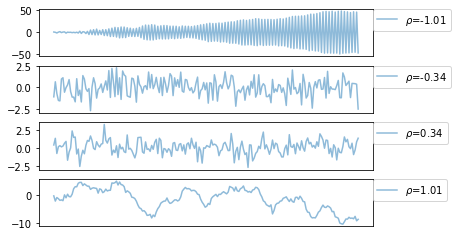

In [137]:
fig, axes = plt.subplots(nplot, 1)
for ax, rho in zip(axes, np.linspace(-1.01, 1.01, nplot)):
    test_samples = ar1_with_forloop.sample(value=(1., rho))
    ar1_samples = tf.stack(test_samples[2:])
    ax.plot(ar1_samples, alpha=.5, label=r'$\rho$=%.2f' % rho)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left',
              borderaxespad=0., fontsize=10)
    ax.get_xaxis().set_visible(False)
    
plt.savefig("../plots/ar1_process.png")

#### ar1_without_forloop

In [138]:
x = tf.zeros([n_t], dtype=float)

In [139]:
x

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [140]:
x[..., :1]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

In [141]:
tf.zeros_like(x[..., :1])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

In [142]:
x[..., :-1]

<tf.Tensor: shape=(199,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [143]:
[tf.zeros_like(x[..., :1]), x[..., :-1]]

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Tensor: shape=(199,), dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [144]:
tf.concat([tf.zeros_like(x[..., :1]), x[..., :-1]], axis=-1)

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [145]:
# %load 'ar1_without_forloop_coroutine.py'
import tensorflow as tf
import tensorflow_probability as tfp

@tfp.distributions.JointDistributionCoroutine
def ar1_without_forloop():
    sigma = yield tfp.distributions.JointDistributionCoroutine.Root(
                    tfp.distributions.HalfNormal(1.))
    rho = yield tfp.distributions.JointDistributionCoroutine.Root(
                    tfp.distributions.Uniform(-1., 1.))
    
    def ar1_fun(x):
        x_tm1 = tf.concat([tf.zeros_like(x[..., :1]), x[..., :-1]], axis=-1)
        loc = x_tm1 * rho[..., None]
        return tfp.distributions.Independent(tfp.distributions.Normal(
            loc=loc, scale=sigma[..., None]),
            reinterpreted_batch_ndims=1)
    
    dist = yield tfp.distributions.Autoregressive(
        distribution_fn=ar1_fun, 
        sample0=tf.zeros([n_t], dtype=rho.dtype), 
        num_steps=n_t)

In [146]:
seed = [1000, 5234]

In [147]:
rho = np.linspace(-1.01, 1.01, 5)

In [148]:
rho

array([-1.01 , -0.505,  0.   ,  0.505,  1.01 ])

In [149]:
sigma = np.ones(5)

In [150]:
sigma

array([1., 1., 1., 1., 1.])

In [151]:
test_samples = ar1_without_forloop.sample(value=(sigma, rho), seed=seed)

In [152]:
test_samples

StructTuple(
  var0=<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 1., 1., 1., 1.], dtype=float32)>,
  var1=<tf.Tensor: shape=(5,), dtype=float32, numpy=array([-1.01 , -0.505,  0.   ,  0.505,  1.01 ], dtype=float32)>,
  var2=<tf.Tensor: shape=(5, 200), dtype=float32, numpy=
    array([[ 3.44785392e-01, -8.60881507e-02, -1.23246884e+00,
             2.47080469e+00, -2.49256015e+00,  1.20700562e+00,
            -1.42001390e-01,  2.04051304e+00,  2.12692499e-01,
            -4.86151338e-01,  6.63698733e-01, -1.22590375e+00,
             1.05322814e+00, -1.50317132e+00,  8.61204505e-01,
            -1.92104816e+00,  3.10184145e+00, -3.87976027e+00,
             3.72692418e+00, -4.88486385e+00,  4.78339195e+00,
            -5.11738253e+00,  4.84870052e+00, -6.94474125e+00,
             6.02318764e+00, -6.51229429e+00,  7.74266052e+00,
            -6.93849325e+00,  6.84686565e+00, -6.50420570e+00,
             6.95705557e+00, -6.18807364e+00,  6.70170116e+00,
            -7.12384415

In [153]:
test_samples[-1]

<tf.Tensor: shape=(5, 200), dtype=float32, numpy=
array([[ 3.44785392e-01, -8.60881507e-02, -1.23246884e+00,
         2.47080469e+00, -2.49256015e+00,  1.20700562e+00,
        -1.42001390e-01,  2.04051304e+00,  2.12692499e-01,
        -4.86151338e-01,  6.63698733e-01, -1.22590375e+00,
         1.05322814e+00, -1.50317132e+00,  8.61204505e-01,
        -1.92104816e+00,  3.10184145e+00, -3.87976027e+00,
         3.72692418e+00, -4.88486385e+00,  4.78339195e+00,
        -5.11738253e+00,  4.84870052e+00, -6.94474125e+00,
         6.02318764e+00, -6.51229429e+00,  7.74266052e+00,
        -6.93849325e+00,  6.84686565e+00, -6.50420570e+00,
         6.95705557e+00, -6.18807364e+00,  6.70170116e+00,
        -7.12384415e+00,  7.93165445e+00, -7.43469381e+00,
         7.82046509e+00, -7.18125248e+00,  9.24216175e+00,
        -8.38435459e+00,  9.39406681e+00, -8.75316143e+00,
         9.27652740e+00, -1.02194996e+01,  1.11905994e+01,
        -1.15695257e+01,  1.20885820e+01, -1.31839876e+01,
      

In [154]:
ar1_samples = tf.transpose(test_samples[-1])

In [155]:
ar1_samples

<tf.Tensor: shape=(200, 5), dtype=float32, numpy=
array([[ 3.44785392e-01, -1.13944530e+00, -4.67819631e-01,
        -1.24911654e+00, -2.13509481e-02],
       [-8.60881507e-02,  1.62911606e+00,  2.20245123e+00,
        -1.19737208e-01,  1.86624086e+00],
       [-1.23246884e+00, -1.37089765e+00, -1.37613431e-01,
        -1.08031034e+00,  4.38599682e+00],
       [ 2.47080469e+00,  6.82878137e-01,  1.21424520e+00,
        -2.81187266e-01,  4.18013239e+00],
       [-2.49256015e+00, -4.85588431e-01,  5.09596802e-02,
        -2.05557466e-01,  4.62294579e+00],
       [ 1.20700562e+00,  1.97009492e+00,  4.22588021e-01,
        -6.13411009e-01,  5.40960312e+00],
       [-1.42001390e-01, -8.95415783e-01,  1.27844423e-01,
         1.09501457e+00,  6.73054981e+00],
       [ 2.04051304e+00,  1.11713493e+00, -3.66249353e-01,
         1.13970160e-01,  8.15732288e+00],
       [ 2.12692499e-01,  2.02445686e-01, -2.26307828e-02,
        -1.42255938e+00,  9.79675198e+00],
       [-4.86151338e-01, -1.0782

Text(0.5, 1.0, 'AR(1) process with varies autoregressive coefficientt (rho)')

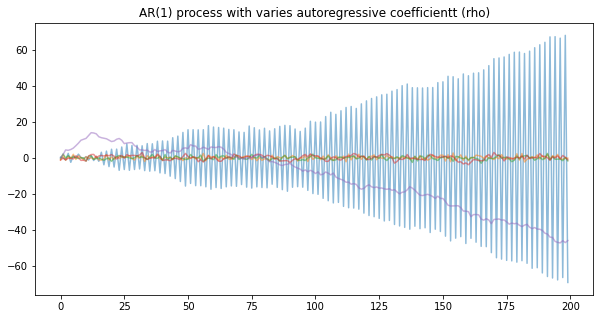

In [156]:
_, ax = plt.subplots(figsize=(10, 5))
ax.plot(ar1_samples, alpha=.5)
ax.set_title('AR(1) process with varies autoregressive coefficientt (rho)')

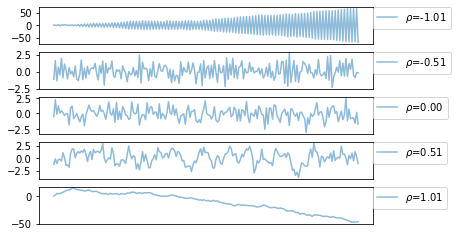

In [157]:
fig, axes = plt.subplots(5, 1)
for i, ax, rho_element in zip(range(5), axes, rho):
    ax.plot(test_samples[-1][i], alpha=.5, label=r'$\rho$=%.2f' % rho_element)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left',
              borderaxespad=0., fontsize=10)
    ax.get_xaxis().set_visible(False)
    
plt.savefig("../plots/ar1_process_without_loop.png")

#### Implement with lag operator

In [158]:
np.ones(5 - 1)

array([1., 1., 1., 1.])

In [159]:
matrix_b = np.diag(np.ones(5 - 1), -1)

In [160]:
matrix_b

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [161]:
matrix_b @ matrix_b

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [162]:
# %load 'ar1_lag_operator.py'
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
root = tfd.JointDistributionCoroutine.Root

lag_operator_b = np.diag(np.ones(n_t - 1), -1)

@tfd.JointDistributionCoroutine
def ar1_lag_operator():
    sigma = yield root(tfd.HalfNormal(1., name='sigma'))
    rho = yield root(tfd.Uniform(-1., 1., name='rho'))
    
    def ar1_fun(x):
        loc = tf.einsum('ij,...j->...i', lag_operator_b, x) * rho[..., None]
        return tfd.Independent(tfd.Normal(loc=loc, scale=sigma[..., None]),
                               reinterpreted_batch_ndims=1)
    
    dist = yield tfd.Autoregressive( distribution_fn=ar1_fun,
            sample0=tf.zeros([n_t], dtype=rho.dtype),
            num_steps=n_t,
            name="ar1")

In [163]:
rho = np.linspace(-1.01, 1.01, 5)

In [164]:
rho

array([-1.01 , -0.505,  0.   ,  0.505,  1.01 ])

In [165]:
sigma = np.ones(5)

In [166]:
sigma

array([1., 1., 1., 1., 1.])

In [167]:
test_samples = ar1_lag_operator.sample(value=(sigma, rho), seed=seed)

In [168]:
test_samples

StructTuple(
  sigma=<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 1., 1., 1., 1.], dtype=float32)>,
  rho=<tf.Tensor: shape=(5,), dtype=float32, numpy=array([-1.01 , -0.505,  0.   ,  0.505,  1.01 ], dtype=float32)>,
  ar1=<tf.Tensor: shape=(5, 200), dtype=float32, numpy=
    array([[ 3.44785392e-01, -8.60881507e-02, -1.23246884e+00,
             2.47080469e+00, -2.49256015e+00,  1.20700562e+00,
            -1.42001390e-01,  2.04051304e+00,  2.12692499e-01,
            -4.86151338e-01,  6.63698733e-01, -1.22590375e+00,
             1.05322814e+00, -1.50317132e+00,  8.61204505e-01,
            -1.92104816e+00,  3.10184145e+00, -3.87976027e+00,
             3.72692418e+00, -4.88486385e+00,  4.78339195e+00,
            -5.11738253e+00,  4.84870052e+00, -6.94474125e+00,
             6.02318764e+00, -6.51229429e+00,  7.74266052e+00,
            -6.93849325e+00,  6.84686565e+00, -6.50420570e+00,
             6.95705557e+00, -6.18807364e+00,  6.70170116e+00,
            -7.12384415e

In [169]:
ar1_samples = tf.transpose(test_samples[-1])

In [170]:
ar1_samples

<tf.Tensor: shape=(200, 5), dtype=float32, numpy=
array([[ 3.44785392e-01, -1.13944530e+00, -4.67819631e-01,
        -1.24911654e+00, -2.13509481e-02],
       [-8.60881507e-02,  1.62911606e+00,  2.20245123e+00,
        -1.19737208e-01,  1.86624086e+00],
       [-1.23246884e+00, -1.37089765e+00, -1.37613431e-01,
        -1.08031034e+00,  4.38599682e+00],
       [ 2.47080469e+00,  6.82878137e-01,  1.21424520e+00,
        -2.81187266e-01,  4.18013239e+00],
       [-2.49256015e+00, -4.85588431e-01,  5.09596802e-02,
        -2.05557466e-01,  4.62294579e+00],
       [ 1.20700562e+00,  1.97009492e+00,  4.22588021e-01,
        -6.13411009e-01,  5.40960312e+00],
       [-1.42001390e-01, -8.95415783e-01,  1.27844423e-01,
         1.09501457e+00,  6.73054981e+00],
       [ 2.04051304e+00,  1.11713493e+00, -3.66249353e-01,
         1.13970160e-01,  8.15732288e+00],
       [ 2.12692499e-01,  2.02445686e-01, -2.26307828e-02,
        -1.42255938e+00,  9.79675198e+00],
       [-4.86151338e-01, -1.0782

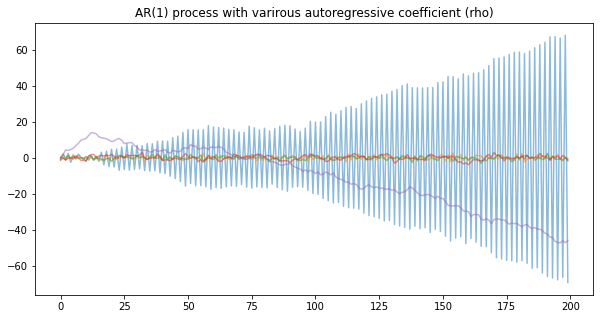

In [171]:
_, ax = plt.subplots(figsize=(10, 5))
ax.plot(ar1_samples, alpha=.5)
ax.set_title('AR(1) process with varirous autoregressive coefficient (rho)');

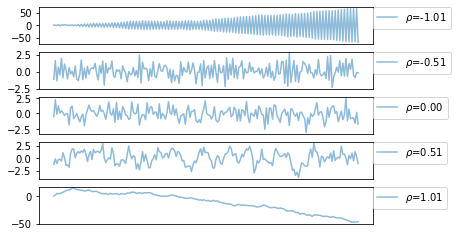

In [172]:
fig, axes = plt.subplots(5, 1)
for i, ax, rho_element in zip(range(5), axes, rho):
    ax.plot(test_samples[-1][i], alpha=.5, label=r'$\rho$=%.2f' % rho_element)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left',
              borderaxespad=0., fontsize=10)
    ax.get_xaxis().set_visible(False)
    
plt.savefig("../plots/ar1_process_lag_operator.png")

#### Use GAM

In [173]:
n_changepoints = 12

In [174]:
# %load 'co2_by_month_data.py'
import numpy as np
import pandas as pd

def co2_by_month_data():

    co2_by_month = pd.read_csv("../data/monthly_mauna_loa_co2_20220721.csv", 
                               comment='#')
    co2_by_month['year_string'] = co2_by_month['year'].astype(str)
    co2_by_month['month_string'] = co2_by_month['month'].astype(str)
    co2_by_month['date_month'] = pd.to_datetime(co2_by_month['year_string'] 
                                        + '/' + co2_by_month['month_string'])
    co2_by_month.set_index('date_month', drop=True, inplace=True)
    co2_by_month.drop(columns=['year', 'month', 'year_string', 
                               'month_string'], inplace=True)
    co2_by_month['CO2'] = co2_by_month['average'].astype(np.float32)
    co2_by_month.drop(columns=['decimal date', 'average', 'deseasonalized', 
                               'ndays', 'sdev', 'unc'], inplace=True)

    num_forecast_steps = 12 * 10 # Forecast the final ten years
    co2_by_month_training_data = co2_by_month[:-num_forecast_steps]
    co2_by_month_testing_data = co2_by_month[-num_forecast_steps:]
    
    num_forecast_steps = 12 * 10 # Forecast the final ten years
    trend_all = np.linspace(0., 1., len(co2_by_month))[..., None]
    trend_all = trend_all.astype(np.float32)
    seasonality_all = pd.get_dummies(
       co2_by_month.index.month).values.astype(np.float32)
    trend = trend_all[:-num_forecast_steps, :]
    seasonality = seasonality_all[:-num_forecast_steps, :]
    
    return (co2_by_month, co2_by_month_training_data, 
            co2_by_month_testing_data, trend_all, seasonality_all, 
            trend, seasonality)

In [175]:
(co2_by_month, co2_by_month_training_data, 
co2_by_month_testing_data, trend_all, seasonality_all, 
trend, seasonality) = co2_by_month_data()

In [176]:
co2_by_month

,CO2
date_month,
1958-03-01,315.700012
1958-04-01,317.450012
1958-05-01,317.510010
1958-06-01,317.239990
1958-07-01,315.859985
...,...
2022-02-01,419.279999
2022-03-01,418.809998
2022-04-01,420.230011


##### Generate trend design matrix for GAM

In [177]:
n_tp = seasonality_all.shape[0]

In [178]:
n_tp

772

In [179]:
t = np.linspace(0, 1, n_tp, dtype=np.float32)

In [180]:
t

array([0.        , 0.00129702, 0.00259403, 0.00389105, 0.00518807,
       0.00648508, 0.0077821 , 0.00907912, 0.01037613, 0.01167315,
       0.01297017, 0.01426719, 0.0155642 , 0.01686122, 0.01815824,
       0.01945525, 0.02075227, 0.02204929, 0.0233463 , 0.02464332,
       0.02594034, 0.02723735, 0.02853437, 0.02983139, 0.0311284 ,
       0.03242542, 0.03372244, 0.03501945, 0.03631647, 0.03761349,
       0.0389105 , 0.04020752, 0.04150454, 0.04280156, 0.04409857,
       0.04539559, 0.04669261, 0.04798963, 0.04928664, 0.05058366,
       0.05188068, 0.05317769, 0.05447471, 0.05577172, 0.05706874,
       0.05836576, 0.05966277, 0.06095979, 0.06225681, 0.06355383,
       0.06485084, 0.06614786, 0.06744488, 0.0687419 , 0.07003891,
       0.07133593, 0.07263295, 0.07392996, 0.07522698, 0.076524  ,
       0.07782101, 0.07911803, 0.08041505, 0.08171206, 0.08300908,
       0.0843061 , 0.08560311, 0.08690013, 0.08819715, 0.08949416,
       0.09079118, 0.0920882 , 0.09338521, 0.09468223, 0.09597

In [181]:
s = np.linspace(0, max(t), n_changepoints + 2, dtype=np.float32)[1: -1]

In [182]:
s

array([0.07692308, 0.15384616, 0.23076923, 0.30769232, 0.3846154 ,
       0.46153846, 0.53846157, 0.61538464, 0.6923077 , 0.7692308 ,
       0.84615386, 0.9230769 ], dtype=float32)

In [183]:
trend_design_matrix_a = (t[:, None] > s).astype(np.float32)

In [184]:
trend_design_matrix_a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

##### Generate seasonality design matrix for GAM

In [191]:
# %load 'fourier_basis_function.py'
import numpy as np

def gen_fourier_basis(t, p=365.25, n=3):
    x = 2 * np.pi * (np.arange(n) + 1) * t[:, None] / p 
    return np.concatenate((np.cos(x), np.sin(x)), axis=1)

In [192]:
seasonality_design_matric_x_pred = gen_fourier_basis(np.where(seasonality_all)[1],
                                        p=seasonality_all.shape[-1],
                                        n=6)

In [193]:
n_pred = seasonality_design_matric_x_pred.shape[-1]

In [194]:
n_pred

12

In [214]:
from gam_alternative import generate_gam

In [215]:
gam = generate_gam(n_changepoints, 
                   trend_design_matrix_a, seasonality_design_matric_x_pred, 
                   n_pred, co2_by_month_training_data, s, t)

In [216]:
gam

<tfp.distributions.JointDistributionCoroutine 'JointDistributionCoroutine' batch_shape=StructTuple(
  beta=[],
  k=[],
  m=[],
  tau=[],
  delta=[],
  noise_sigma=[],
  observed=[]
) event_shape=StructTuple(
  beta=[12],
  k=[],
  m=[],
  tau=[],
  delta=[12],
  noise_sigma=[],
  observed=[652]
) dtype=StructTuple(
  beta=float32,
  k=float32,
  m=float32,
  tau=float32,
  delta=float32,
  noise_sigma=float32,
  observed=float32
)>

In [227]:
from gam_with_ar_likelihood import generate_gam_ar_likelihood

In [228]:
gam_with_ar_likelihood = generate_gam_ar_likelihood(n_changepoints, 
                 trend_design_matrix_a, seasonality_design_matric_x_pred, 
                 n_pred, co2_by_month_training_data, s, t)

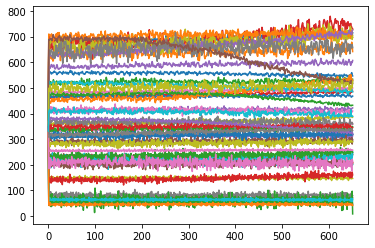

In [229]:
plt.plot(tf.transpose(gam_with_ar_likelihood.sample(50)[-1]));

In [231]:
run_mcmc = tf.function(tfp.experimental.mcmc.windowed_adaptive_nuts, autograph=False, jit_compile=True)

In [232]:
%%time
mcmc_samples, sampler_stats = run_mcmc(
    1000, gam_with_ar_likelihood, n_chains=4, num_adaptation_steps=1000,
    seed=tf.constant([-234272345, 73564234], dtype=tf.int32),
    observed=co2_by_month_training_data.T)

Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.


2022-07-28 13:58:29.888711: I tensorflow/compiler/xla/service/service.cc:170] XLA service 0x7fd7a0d16260 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-07-28 13:58:29.889108: I tensorflow/compiler/xla/service/service.cc:178]   StreamExecutor device (0): Host, Default Version
2022-07-28 13:58:31.225547: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:263] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-07-28 13:58:32.569884: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:38] Ignoring Assert operator mcmc_retry_init/assert_equal_1/Assert/AssertGuard/Assert
2022-07-28 13:59:14.530699: I tensorflow/compiler/jit/xla_compilation_cache.cc:478] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


CPU times: user 2min 37s, sys: 2.65 s, total: 2min 39s
Wall time: 2min 47s


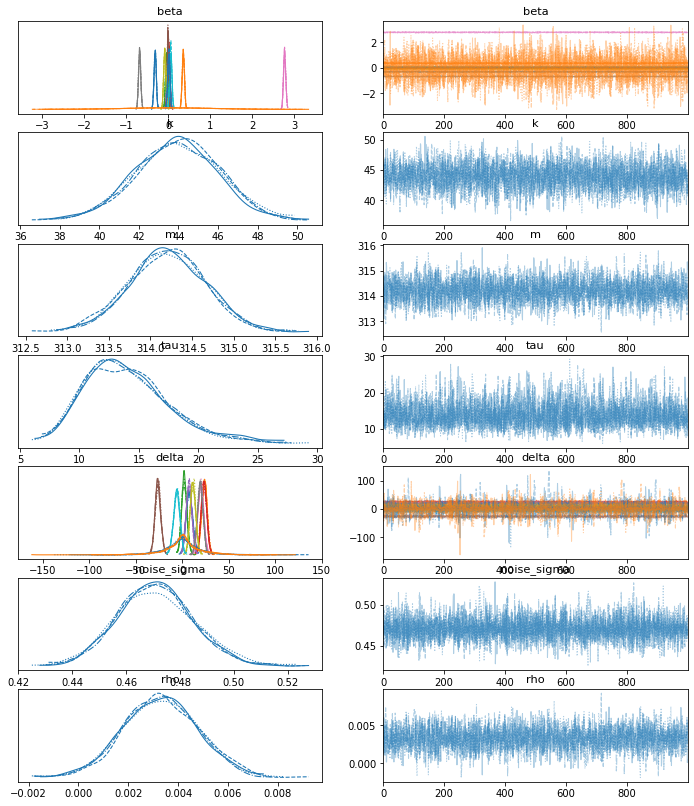

In [233]:
gam_ar_likelihood_idata = az.from_dict(
    posterior={
        k:np.swapaxes(v.numpy(), 1, 0)
        for k, v in mcmc_samples._asdict().items()}, 
    sample_stats={
        k:np.swapaxes(sampler_stats[k], 1, 0)
        for k in ["target_log_prob", "diverging", "accept_ratio", "n_steps"]}
)
axes = az.plot_trace(gam_ar_likelihood_idata, compact=True);

In [234]:
k, m, tau, delta = mcmc_samples[1:5]

In [235]:
growth_rate = k[..., None] + tf.einsum('ij,...j->...i', trend_design_matrix_a, delta)

In [236]:
offset = m[..., None] + tf.einsum('ij,...j->...i', trend_design_matrix_a, -s * delta)

In [237]:
trend_posterior = growth_rate * t + offset

In [238]:
seasonality_posterior = tf.einsum('ij,...j->...i', seasonality_design_matric_x_pred, mcmc_samples[0])

In [240]:
nchains = gam_ar_likelihood_idata.posterior.dims['chain']

In [241]:
nchains

4

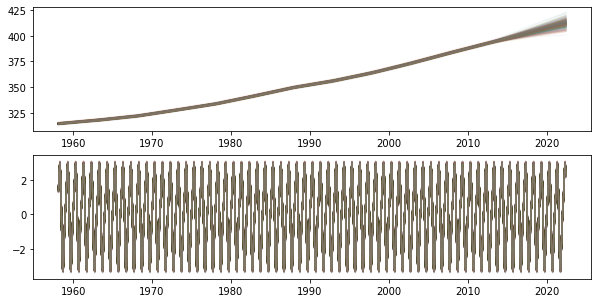

In [242]:
_, ax = plt.subplots(2, 1, figsize=(10, 5))
for i in range(nchains): 
    ax[0].plot(co2_by_month.index,
               trend_posterior[-100:, i, :].numpy().T, alpha=.05)
    ax[1].plot(co2_by_month.index,
               seasonality_posterior[-100:, i, :].numpy().T, alpha=.05)

In [244]:
gam_with_ar_likelihood_full = generate_gam_ar_likelihood(n_changepoints, 
                 trend_design_matrix_a, seasonality_design_matric_x_pred, 
                 n_pred, co2_by_month_training_data, s, t, training=False)

In [245]:
_, values = gam_with_ar_likelihood_full.sample_distributions(value=mcmc_samples)

In [246]:
values

StructTuple(
  beta=<tf.Tensor: shape=(1000, 4, 12), dtype=float32, numpy=
    array([[[-3.19433630e-01,  3.61915588e-01, -6.77682236e-02, ...,
              5.40744029e-02,  3.22819134e-04,  3.05165917e-01],
            [-2.97638297e-01,  3.81192982e-01, -4.01408933e-02, ...,
              5.03577590e-02,  4.87187728e-02, -1.92511988e+00],
            [-3.40907484e-01,  3.67845386e-01, -7.06697023e-03, ...,
              1.09419733e-01,  2.15004310e-02, -5.73702812e-01],
            [-3.00844103e-01,  4.05546755e-01, -7.57968472e-03, ...,
              1.05065085e-01,  1.85327325e-02,  7.04472661e-01]],
    
           [[-2.79569119e-01,  3.42334241e-01, -4.89885621e-02, ...,
              6.27199784e-02,  1.18721072e-02, -6.63958549e-01],
            [-3.19298983e-01,  3.56723279e-01, -1.12705193e-02, ...,
              8.97629559e-02,  2.74333227e-02,  7.18070924e-01],
            [-3.03817630e-01,  3.95723999e-01, -6.53315857e-02, ...,
              1.02062464e-01,  4.32353243e-02,

In [247]:
fitted_with_forecast = values[-1].numpy()

In [250]:
average_forecast = np.mean(fitted_with_forecast, axis=(0, 1)).T

In [253]:
# %load 'plot_co2_data.py'
def plot_co2_data(fig_ax=None):
    if not fig_ax:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    else:
        fig, ax = fig_ax
    ax.plot(co2_by_month_training_data, label="training data")
    ax.plot(co2_by_month_testing_data, color="C4", label="testing data")
    ax.legend()
    ax.set(
        ylabel="Atmospheric CO2 concentration (ppm)",
        xlabel="Year"
    )
    ax.text(0.99, .02,
              """Source: National Oceanic & Atmospheric Administraion 
                         Trends in Atmospheric Carbon Dioxide
              https://gml.noaa.gov/ccgg/trends/data.html""",
              transform=ax.transAxes,
              horizontalalignment="right",
              alpha=0.5)
    fig.autofmt_xdate()
    return fig, ax

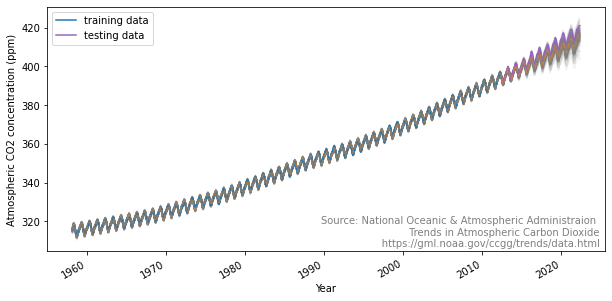

In [254]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(co2_by_month.index, fitted_with_forecast[-100:, 0, :].T, color='gray',
alpha=.1);
ax.plot(co2_by_month.index, fitted_with_forecast[-100:, 1, :].T, color='gray',
alpha=.1);
plot_co2_data((fig, ax));
ax.plot(co2_by_month.index, average_forecast, ls='--', label='GAM forecast',
alpha=.5);

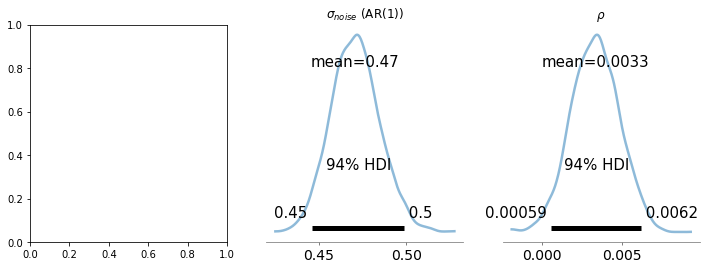

In [255]:
fig, axes = plt.subplots(1, 3, figsize=(4*3, 4))

az.plot_posterior(gam_ar_likelihood_idata, var_names=['noise_sigma', 'rho'], alpha=.5, lw=2.5, ax=axes[1:]);
axes[1].set_title(r'$\sigma_{noise}$ (AR(1))')
axes[2].set_title(r'$\rho$')

plt.savefig("../plots/ar1_likelihood_rho.png");

In [256]:
from gam_with_latent_ar import generate_gam_ar_latent

In [258]:
gam_with_latent_ar = generate_gam_ar_latent(n_changepoints, 
                 trend_design_matrix_a, seasonality_design_matric_x_pred, 
                 n_pred, co2_by_month_training_data, s, t)

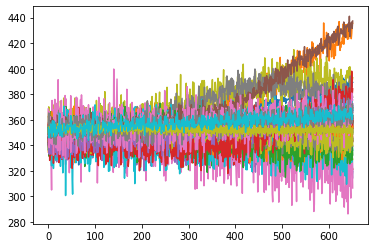

In [259]:
plt.plot(tf.transpose(gam_with_latent_ar.sample(50)[-1]));

In [260]:
%%time
mcmc_samples, sampler_stats = run_mcmc(
    1000, gam_with_latent_ar, n_chains=4, num_adaptation_steps=1000,
    seed=tf.constant([36245, 734565], dtype=tf.int32),
    observed=co2_by_month_training_data.T)

2022-07-28 14:49:34.367136: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:38] Ignoring Assert operator mcmc_retry_init/assert_equal_1/Assert/AssertGuard/Assert


CPU times: user 8min 44s, sys: 12 s, total: 8min 56s
Wall time: 9min 21s


In [261]:
mcmc_samples

StructTuple(
  beta=<tf.Tensor: shape=(1000, 4, 12), dtype=float32, numpy=
    array([[[-3.1179395e-01,  3.7969318e-01, -1.4387160e-02, ...,
              4.5532882e-02,  1.3217571e-03, -1.7059933e-01],
            [-2.8813443e-01,  3.7752968e-01, -3.1823784e-02, ...,
              7.3473014e-02,  1.3659529e-02,  1.1001983e+00],
            [-2.7690503e-01,  3.4311461e-01, -3.4661528e-02, ...,
              7.2051957e-02,  3.7855774e-02, -1.0863658e+00],
            [-3.1158948e-01,  3.6789930e-01, -4.3577656e-02, ...,
              7.7613048e-02,  1.4404423e-02,  4.6566188e-01]],
    
           [[-3.3749428e-01,  3.8346726e-01, -1.0826001e-02, ...,
              5.6158863e-02, -8.1842742e-04,  1.5684444e-02],
            [-3.0054632e-01,  3.6603570e-01, -2.4805482e-02, ...,
              8.6418770e-02,  1.5425095e-02,  7.2578394e-01],
            [-2.9600805e-01,  3.4677315e-01, -2.4226449e-02, ...,
              6.5063901e-02,  4.9197100e-02, -1.1594158e+00],
            [-3.2819334

In [262]:
sampler_stats

{'step_size': <tf.Tensor: shape=(1000,), dtype=float32, numpy=
 array([0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.00122535, 0.00122535,
        0.00122535, 0.00122535, 0.00122535, 0.0012253

In [263]:
nuts_trace_ar_latent = az.from_dict(
    posterior={
        k:np.swapaxes(v.numpy(), 1, 0)
        for k, v in mcmc_samples._asdict().items()}, 
    sample_stats={
        k:np.swapaxes(sampler_stats[k], 1, 0)
        for k in ["target_log_prob", "diverging", "accept_ratio", "n_steps"]}
)

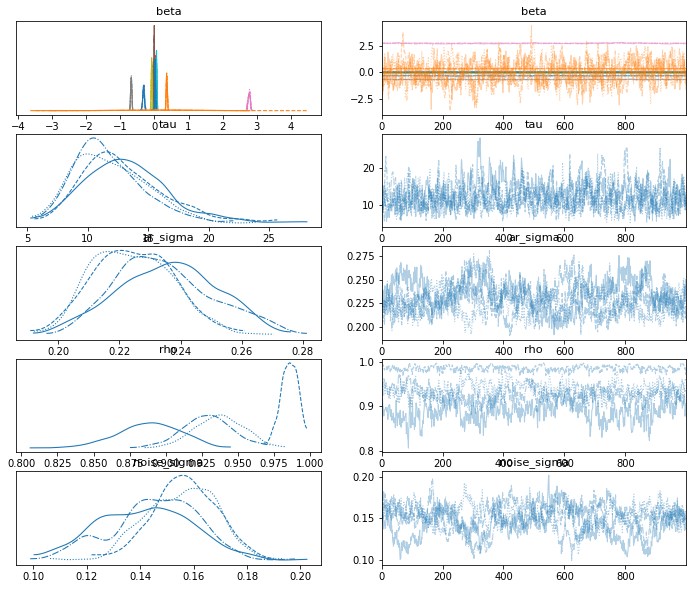

In [264]:
axes = az.plot_trace(
    nuts_trace_ar_latent,
    var_names=['beta', 'tau', 'ar_sigma', 'rho', 'noise_sigma'], 
    compact=True);

In [266]:
gam_with_latent_ar_full = generate_gam_ar_latent(n_changepoints, 
                 trend_design_matrix_a, seasonality_design_matric_x_pred, 
                 n_pred, co2_by_month_training_data, s, t, training=False)

In [267]:
posterior_dists, ppc_samples = gam_with_latent_ar_full.sample_distributions(
    value=mcmc_samples)

In [268]:
posterior_dists

StructTuple(
  beta=<tfp.distributions.Sample 'beta' batch_shape=[] event_shape=[12] dtype=float32>,
  k=<tfp.distributions.HalfNormal 'k' batch_shape=[] event_shape=[] dtype=float32>,
  m=<tfp.distributions.Normal 'm' batch_shape=[] event_shape=[] dtype=float32>,
  tau=<tfp.distributions.HalfNormal 'tau' batch_shape=[] event_shape=[] dtype=float32>,
  delta=<tfp.distributions.Sample 'delta' batch_shape=[1000, 4] event_shape=[12] dtype=float32>,
  noise_sigma=<tfp.distributions.HalfNormal 'noise_sigma' batch_shape=[] event_shape=[] dtype=float32>,
  ar_sigma=<tfp.distributions.HalfNormal 'ar_sigma' batch_shape=[] event_shape=[] dtype=float32>,
  rho=<tfp.distributions.Uniform 'rho' batch_shape=[] event_shape=[] dtype=float32>,
  temporal_error=<tfp.distributions.Autoregressive 'temporal_error' batch_shape=? event_shape=? dtype=float32>,
  observed=<tfp.distributions.Independent 'observed' batch_shape=[1000, 4] event_shape=[772] dtype=float32>
)

In [269]:
ppc_samples

StructTuple(
  beta=<tf.Tensor: shape=(1000, 4, 12), dtype=float32, numpy=
    array([[[-3.1179395e-01,  3.7969318e-01, -1.4387160e-02, ...,
              4.5532882e-02,  1.3217571e-03, -1.7059933e-01],
            [-2.8813443e-01,  3.7752968e-01, -3.1823784e-02, ...,
              7.3473014e-02,  1.3659529e-02,  1.1001983e+00],
            [-2.7690503e-01,  3.4311461e-01, -3.4661528e-02, ...,
              7.2051957e-02,  3.7855774e-02, -1.0863658e+00],
            [-3.1158948e-01,  3.6789930e-01, -4.3577656e-02, ...,
              7.7613048e-02,  1.4404423e-02,  4.6566188e-01]],
    
           [[-3.3749428e-01,  3.8346726e-01, -1.0826001e-02, ...,
              5.6158863e-02, -8.1842742e-04,  1.5684444e-02],
            [-3.0054632e-01,  3.6603570e-01, -2.4805482e-02, ...,
              8.6418770e-02,  1.5425095e-02,  7.2578394e-01],
            [-2.9600805e-01,  3.4677315e-01, -2.4226449e-02, ...,
              6.5063901e-02,  4.9197100e-02, -1.1594158e+00],
            [-3.2819334

In [270]:
beta, k, m, tau, delta = mcmc_samples[:5]

In [271]:
growth_rate = k[..., None] + tf.einsum('ij,...j->...i', trend_design_matrix_a, delta)

In [272]:
offset = m[..., None] + tf.einsum('ij,...j->...i', trend_design_matrix_a, -s * delta)

In [273]:
trend_posterior = growth_rate * t + offset

In [274]:
seasonality_posterior = tf.einsum('ij,...j->...i', seasonality_design_matric_x_pred, beta)

In [275]:
temporal_error = mcmc_samples[-1]

In [276]:
nchains_2 = nuts_trace_ar_latent.posterior.dims['chain']

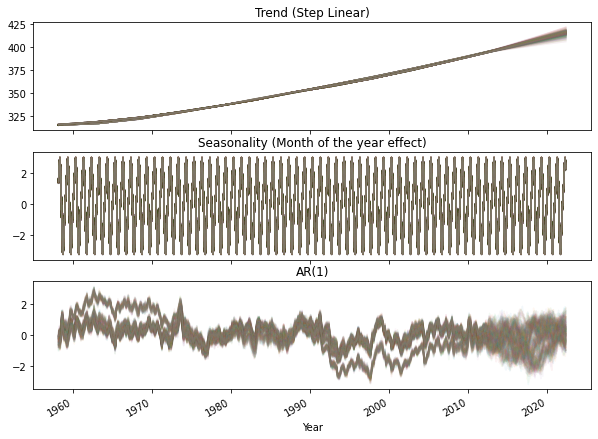

In [277]:
fig, ax = plt.subplots(3, 1, figsize=(10, 7.5), sharex=True)

for i in range(nchains_2):
    ax[0].plot(co2_by_month.index, trend_posterior[-100:, i, :].numpy().T, alpha=.05);
    ax[1].plot(co2_by_month.index, seasonality_posterior[-100:, i, :].numpy().T, alpha=.05);
    ax[2].plot(co2_by_month.index, temporal_error[-100:, i, :].numpy().T, alpha=.05);
    
ax[0].set_title('Trend (Step Linear)')
ax[1].set_title('Seasonality (Month of the year effect)')
ax[2].set_title('AR(1)')
ax[2].set_xlabel("Year")
fig.autofmt_xdate()

plt.savefig("../plots/posterior_predictive_ar1.png");

In [278]:
fitted_with_forecast = ppc_samples[-1].numpy()

In [279]:
fitted_with_forecast

array([[[315.80072, 317.33206, 317.4984 , ..., 415.3863 , 416.4532 ,
         416.32303],
        [316.10934, 317.42554, 317.73462, ..., 415.93063, 415.98578,
         415.85742],
        [316.25867, 317.39294, 317.7139 , ..., 418.1299 , 418.51108,
         417.82867],
        [316.18222, 317.27676, 317.40775, ..., 414.72562, 415.15784,
         414.59116]],

       [[315.58643, 317.36032, 317.45596, ..., 419.7161 , 420.1477 ,
         420.04602],
        [315.87628, 317.12735, 317.6655 , ..., 416.20163, 417.03726,
         416.20538],
        [316.2485 , 317.40134, 318.14963, ..., 415.49548, 416.19962,
         415.5208 ],
        [316.12015, 317.78534, 317.8861 , ..., 413.3075 , 414.25323,
         413.34808]],

       [[316.11993, 317.31757, 317.75787, ..., 418.89456, 419.91464,
         418.97485],
        [315.97824, 317.276  , 317.6819 , ..., 415.9654 , 416.5195 ,
         416.16943],
        [316.2595 , 317.3765 , 317.62772, ..., 417.45584, 417.78424,
         418.00876],
      

In [280]:
average_forecast = np.mean(fitted_with_forecast, axis=(0, 1)).T

In [281]:
average_forecast

array([315.94968, 317.31238, 317.65054, 317.2648 , 316.02014, 314.649  ,
       313.01483, 312.49384, 313.43655, 314.65555, 315.5973 , 316.3241 ,
       316.74857, 317.80075, 318.37595, 318.05945, 316.62634, 314.8439 ,
       313.61462, 313.4037 , 314.67688, 315.62747, 316.4363 , 317.00082,
       317.69943, 319.09305, 319.95773, 319.53403, 318.08832, 315.89877,
       314.1359 , 313.87268, 315.0034 , 316.16037, 316.97186, 317.69196,
       318.50388, 319.62473, 320.45227, 319.85703, 318.56088, 316.7    ,
       315.04797, 315.13507, 316.09494, 317.07755, 317.96924, 318.62625,
       319.57922, 320.62555, 321.09927, 320.67404, 319.4919 , 317.45584,
       316.0071 , 315.54086, 316.65753, 317.74216, 318.67392, 319.15198,
       319.9542 , 321.38123, 322.12524, 321.45172, 319.80756, 317.77823,
       316.15604, 315.98944, 317.1176 , 318.3788 , 319.46988, 320.0307 ,
       320.7473 , 321.86557, 322.32718, 321.86908, 320.4559 , 318.55365,
       316.7676 , 316.75403, 317.70697, 318.72992, 

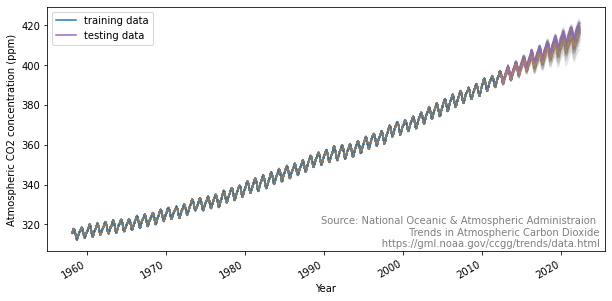

In [285]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(co2_by_month.index, fitted_with_forecast[-100:, 0, :].T, color='gray',
alpha=.1);
ax.plot(co2_by_month.index, fitted_with_forecast[-100:, 1, :].T, color='gray',
alpha=.1);

plot_co2_data((fig, ax));

ax.plot(co2_by_month.index, average_forecast, ls='--', label='GAM forecast',
alpha=.5);

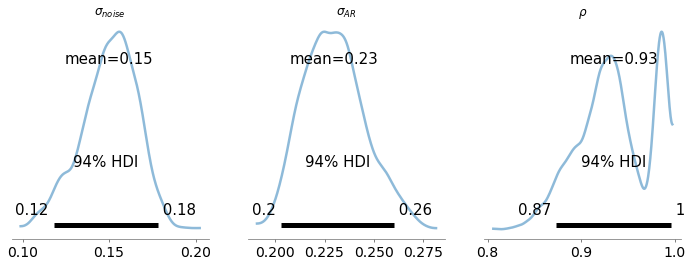

In [286]:
axes = az.plot_posterior(
    nuts_trace_ar_latent,
    var_names=['noise_sigma', 'ar_sigma', 'rho'],
    alpha=.5, lw=2.5,
    figsize=(4*3, 4));
axes[0].set_title(r'$\sigma_{noise}$') 
axes[1].set_title(r'$\sigma_{AR}$') 
axes[2].set_title(r'$\rho$')

plt.savefig("../plots/ar1_likelihood_rho2.png");

### Latent AR Process and Smoothing


In [287]:
num_steps = 100

In [288]:
x = np.linspace(0, 50, num_steps)

In [289]:
x

array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
        2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
        5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
        7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
       10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
       12.62626263, 13.13131313, 13.63636364, 14.14141414, 14.64646465,
       15.15151515, 15.65656566, 16.16161616, 16.66666667, 17.17171717,
       17.67676768, 18.18181818, 18.68686869, 19.19191919, 19.6969697 ,
       20.2020202 , 20.70707071, 21.21212121, 21.71717172, 22.22222222,
       22.72727273, 23.23232323, 23.73737374, 24.24242424, 24.74747475,
       25.25252525, 25.75757576, 26.26262626, 26.76767677, 27.27272727,
       27.77777778, 28.28282828, 28.78787879, 29.29292929, 29.7979798 ,
       30.3030303 , 30.80808081, 31.31313131, 31.81818182, 32.32323232,
       32.82828283, 33.33333333, 33.83838384, 34.34343434, 34.84

In [290]:
f = np.exp(1.0 + np.power(x, 0.5) - np.exp(x/15.0))

In [291]:
y = f + np.random.normal(scale=1.0, size=x.shape)

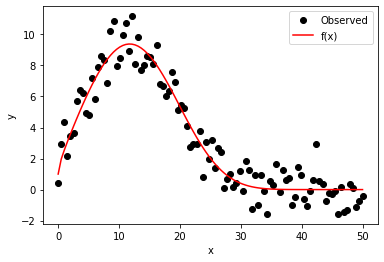

In [292]:
plt.plot(x, y, 'ok', label='Observed')
plt.plot(x, f, 'r', label='f(x)')
plt.legend()
plt.xlabel('x');
plt.ylabel('y');

In [297]:
from smoothing_grw import generate_smoothing_grw

In [298]:
smoothing_grw = generate_smoothing_grw(num_steps)

In [299]:
%%time
mcmc_samples, sampler_stats = run_mcmc(
    1000, smoothing_grw, n_chains=4, num_adaptation_steps=1000, 
    observed=tf.constant(y[None, ...], dtype=tf.float32))

Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.


2022-07-28 17:22:39.333466: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at functional_ops.cc:374 : INTERNAL: No function library
2022-07-28 17:22:39.337848: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at functional_ops.cc:374 : INTERNAL: No function library
2022-07-28 17:22:39.399997: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at functional_ops.cc:374 : INTERNAL: No function library
2022-07-28 17:22:39.400128: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at functional_ops.cc:374 : INTERNAL: No function library
2022-07-28 17:22:39.450017: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at functional_ops.cc:374 : INTERNAL: No function library
2022-07-28 17:22:39.450149: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at functional_ops.cc:374 : INTERNAL: No function library
2022-07-28 17:22:39.488195: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed 

CPU times: user 1min 4s, sys: 5.93 s, total: 1min 10s
Wall time: 1min 18s


In [300]:
mcmc_samples

StructTuple(
  var0=<tf.Tensor: shape=(1000, 4), dtype=float32, numpy=
    array([[0.60090226, 0.49622676, 0.5055582 , 0.54433745],
           [0.49243808, 0.49289003, 0.60376453, 0.7195474 ],
           [0.5539676 , 0.42215082, 0.44732964, 0.7228107 ],
           ...,
           [0.7195078 , 0.60259306, 0.41572005, 0.7444826 ],
           [0.5654314 , 0.66671205, 0.4105087 , 0.5860085 ],
           [0.66553164, 0.68425965, 0.6694166 , 0.5904093 ]], dtype=float32)>,
  var1=<tf.Tensor: shape=(1000, 4), dtype=float32, numpy=
    array([[1.4315192, 1.2376904, 1.0642139, 1.5430875],
           [1.0788965, 1.3529494, 1.2831275, 1.8969629],
           [1.2946752, 1.2320572, 1.0300312, 1.6460574],
           ...,
           [1.3775792, 1.4263519, 1.1705027, 1.3095696],
           [1.6995876, 1.7752725, 2.0406332, 1.5766418],
           [1.1578768, 1.6464196, 1.4146738, 1.5151309]], dtype=float32)>,
  var2=<tf.Tensor: shape=(1000, 4, 100), dtype=float32, numpy=
    array([[[ 0.7608865 ,  2.136

In [301]:
sampler_stats

{'step_size': <tf.Tensor: shape=(1000,), dtype=float32, numpy=
 array([0.01963504, 0.01963504, 0.01963504, 0.01963504, 0.01963504,
        0.01963504, 0.01963504, 0.01963504, 0.01963504, 0.01963504,
        0.01963504, 0.01963504, 0.01963504, 0.01963504, 0.01963504,
        0.01963504, 0.01963504, 0.01963504, 0.01963504, 0.01963504,
        0.01963504, 0.01963504, 0.01963504, 0.01963504, 0.01963504,
        0.01963504, 0.01963504, 0.01963504, 0.01963504, 0.01963504,
        0.01963504, 0.01963504, 0.01963504, 0.01963504, 0.01963504,
        0.01963504, 0.01963504, 0.01963504, 0.01963504, 0.01963504,
        0.01963504, 0.01963504, 0.01963504, 0.01963504, 0.01963504,
        0.01963504, 0.01963504, 0.01963504, 0.01963504, 0.01963504,
        0.01963504, 0.01963504, 0.01963504, 0.01963504, 0.01963504,
        0.01963504, 0.01963504, 0.01963504, 0.01963504, 0.01963504,
        0.01963504, 0.01963504, 0.01963504, 0.01963504, 0.01963504,
        0.01963504, 0.01963504, 0.01963504, 0.0196350

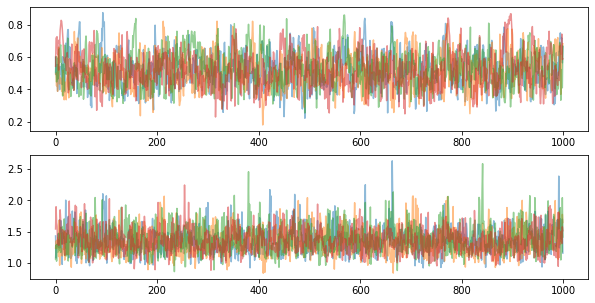

In [302]:
_, ax = plt.subplots(2, 1, figsize=(10, 5))
ax[0].plot(mcmc_samples[0], alpha=.5)
ax[1].plot(mcmc_samples[1], alpha=.5);

In [303]:
nsample, nchain = mcmc_samples[-1].shape[:2]

In [306]:
nsample

1000

In [307]:
nchain

4

In [304]:
mcmc_samples[-1].shape

TensorShape([1000, 4, 100])

In [305]:
tf.math.cumsum(mcmc_samples[-1], axis=-1)

<tf.Tensor: shape=(1000, 4, 100), dtype=float32, numpy=
array([[[ 0.7608865 ,  2.8976166 ,  4.3225513 , ..., -0.3979009 ,
          0.11030963,  0.2856853 ],
        [ 1.5608796 ,  2.292552  ,  3.47449   , ..., -0.6425959 ,
         -0.65244555, -1.0511286 ],
        [ 1.0656636 ,  2.5700512 ,  3.6468909 , ..., -0.17311205,
         -0.81750387, -0.3751327 ],
        [ 0.9078601 ,  3.5805187 ,  3.2370667 , ..., -0.5971327 ,
         -0.7744766 , -1.2305341 ]],

       [[ 1.0068918 ,  2.5320024 ,  2.8140583 , ...,  0.0944958 ,
         -0.3034134 , -0.32530227],
        [ 1.2309288 ,  3.0236578 ,  3.3477025 , ..., -0.6380215 ,
         -0.7345429 ,  0.34312862],
        [ 0.58433855,  2.0677156 ,  2.7871103 , ..., -1.3645844 ,
         -0.5041425 , -0.63437235],
        [ 0.7230255 ,  2.045086  ,  3.9805465 , ..., -0.6277782 ,
         -1.2064799 , -0.11339307]],

       [[ 1.7975048 ,  2.633389  ,  3.751055  , ..., -1.8481691 ,
         -1.2403382 , -0.63076276],
        [ 0.41917768, 

In [308]:
z = tf.reshape(tf.math.cumsum(mcmc_samples[-1], axis=-1), [nsample*nchain, -1])

In [309]:
z

<tf.Tensor: shape=(4000, 100), dtype=float32, numpy=
array([[ 0.7608865 ,  2.8976166 ,  4.3225513 , ..., -0.3979009 ,
         0.11030963,  0.2856853 ],
       [ 1.5608796 ,  2.292552  ,  3.47449   , ..., -0.6425959 ,
        -0.65244555, -1.0511286 ],
       [ 1.0656636 ,  2.5700512 ,  3.6468909 , ..., -0.17311205,
        -0.81750387, -0.3751327 ],
       ...,
       [ 0.61133325,  3.1987476 ,  2.9418182 , ...,  0.6142277 ,
        -0.06352842, -0.7483061 ],
       [ 0.95175695,  2.6274996 ,  4.2540345 , ..., -0.99427307,
        -0.5747322 , -0.32321048],
       [ 0.31437784,  3.1563704 ,  2.954458  , ..., -1.3556522 ,
        -0.75089484, -0.40797937]], dtype=float32)>

In [315]:
tf.reduce_mean(z, axis=0)

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([ 0.91847587,  2.3943057 ,  3.2849479 ,  2.9486613 ,  3.514999  ,
        4.1190023 ,  5.263308  ,  5.875044  ,  5.8527293 ,  5.421294  ,
        5.5383267 ,  6.476771  ,  6.5919127 ,  7.5665855 ,  8.146091  ,
        8.214063  ,  8.108877  ,  9.385045  ,  9.761873  ,  8.878726  ,
        9.00952   ,  9.684773  , 10.042275  ,  9.622983  ,  9.971509  ,
        9.000532  ,  9.094526  ,  8.33463   ,  8.258873  ,  8.446048  ,
        8.425086  ,  8.262271  ,  8.324644  ,  7.2957187 ,  6.8246074 ,
        6.458154  ,  6.549833  ,  6.883241  ,  6.493303  ,  5.6177754 ,
        5.338458  ,  4.9113994 ,  4.1185627 ,  3.2983584 ,  3.0686333 ,
        2.9800632 ,  2.97371   ,  2.0381267 ,  2.5310187 ,  2.3387327 ,
        2.544329  ,  2.0209818 ,  2.1891801 ,  1.8369061 ,  0.8664826 ,
        0.77377254,  0.7732797 ,  0.4939524 ,  0.54345363,  0.7993743 ,
        0.5472852 ,  1.082781  ,  0.7487544 , -0.15554324,  0.22214621,
       -0.235423

In [310]:
lower, upper = np.percentile(z, [5, 95], axis=0)

In [311]:
lower

array([ 0.08018428,  1.50037901,  2.33894974,  2.05305706,  2.61930599,
        3.22501445,  4.36449285,  4.98241904,  4.92948914,  4.49780412,
        4.6372242 ,  5.5916652 ,  5.70015357,  6.69618955,  7.24340568,
        7.34057379,  7.20561237,  8.50328064,  8.81281786,  7.97733207,
        8.11168141,  8.77658925,  9.15014648,  8.6957406 ,  9.01020193,
        8.11831012,  8.20570755,  7.43354342,  7.38774059,  7.54532518,
        7.54901812,  7.37381873,  7.42164626,  6.40902829,  5.92287204,
        5.57523618,  5.6400754 ,  5.9557354 ,  5.58971162,  4.74646358,
        4.43765929,  4.03663599,  3.23920014,  2.41605872,  2.19111782,
        2.10043129,  2.08728142,  1.08927101,  1.61530361,  1.45988998,
        1.65244845,  1.15336639,  1.29921638,  0.94490973, -0.053747  ,
       -0.12636028, -0.09585065, -0.41045385, -0.36822425, -0.10908024,
       -0.34411563,  0.18669706, -0.1256096 , -1.05551783, -0.63524529,
       -1.13741817, -0.67090591, -1.03796059, -1.46758985, -0.73

In [312]:
upper

array([ 1.73953541,  3.27902356,  4.22115452,  3.85816573,  4.3997241 ,
        5.01574283,  6.12554779,  6.7735714 ,  6.7313499 ,  6.31287227,
        6.42339733,  7.35755086,  7.45681322,  8.42591743,  9.0306591 ,
        9.08074245,  9.00048251, 10.31132383, 10.71077504,  9.78253775,
        9.90867109, 10.57587132, 10.9405477 , 10.53817182, 10.91304822,
        9.9172883 ,  9.96942844,  9.23396602,  9.16150918,  9.3460588 ,
        9.29843779,  9.1366631 ,  9.23086472,  8.15252008,  7.71239464,
        7.36030848,  7.48939035,  7.7955374 ,  7.39226682,  6.49003465,
        6.23424289,  5.81000848,  5.02984927,  4.19775293,  3.93317682,
        3.853987  ,  3.86411303,  2.95149029,  3.41689516,  3.21873322,
        3.43230799,  2.89731959,  3.07725518,  2.72524108,  1.76541685,
        1.64437866,  1.60181013,  1.38626475,  1.41586816,  1.72545701,
        1.45193507,  1.97554689,  1.62976584,  0.78081848,  1.09526004,
        0.64424883,  1.10887864,  0.76182223,  0.35028418,  1.07

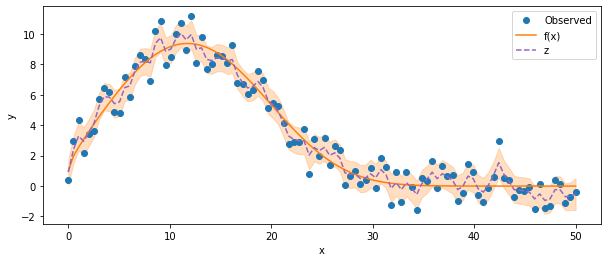

In [313]:
_, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, y, 'o', label='Observed')
ax.plot(x, f, label='f(x)')
ax.fill_between(x, lower, upper, color='C1', alpha=.25)
ax.plot(x, tf.reduce_mean(z, axis=0), color='C4', ls='--', label='z')
ax.legend()
ax.set_xlabel('x');
ax.set_ylabel('y');

plt.savefig("../plots/smoothing_with_gw.png");